In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.tree import export_graphviz
from sklearn.linear_model import Lasso,LassoCV, LogisticRegression, ElasticNet, Ridge, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_selection import RFE
import graphviz
sns.set(color_codes=True)
%matplotlib inline

##### Loading data set

In [145]:
data = pd.read_csv('../data/mushroom_data.csv')

##### Checking dimesnions

In [146]:
data.shape

(8124, 23)

##### Exploratory Data Analysis

##### Describing the loaded data set

In [147]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface-below-ring,stalk_color-above-ring,stalk_color-below-ring,veil_type,veil_color,ring_number,ring_type,spore_print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [148]:
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface-below-ring,stalk_color-above-ring,stalk_color-below-ring,veil_type,veil_color,ring_number,ring_type,spore_print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


###### Drop column Stalk Root
I decided to drop this column as this attribute has 2480 missing valuues, which is approximately 1/3 of total observations. I did some domain search and I think this factor is not that important in determining if a mushroom is edible or not.

In [149]:
data=data.drop('stalk_root', axis=1)

In [150]:
data.columns = ['class_label' if x=='class' else x for x in data.columns]

##### Data Visualization

> Here I have plotted the data into a 3D space. The data points with similar features appear close to each other and the data points that have different features show up as more distant dots. It is clear that we have a clustered dataset.

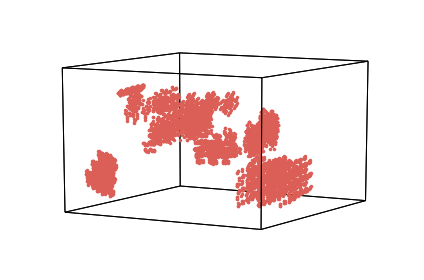

In [151]:
import hypertools as hyp
hyp.plot(data,'.', save_path='../results/dataviz_3d_clusters.png')

>We recently learnt abour visualizing data using different methods, tSNE being one of them.It converts high dimensional Euclidean distances between data points into conditional probability representing similarities. I have used this approach below, coloring it my feature class_label, where 'p' is poisonous and 'e' is edible. 

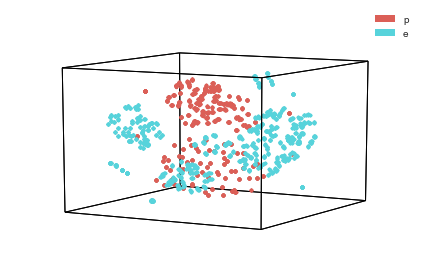

In [143]:
TSNE_model = TSNE(n_components=3)
reduced_data_TSNE = TSNE_model.fit_transform(hyp.tools.df2mat(data))
hyp.plot(reduced_data_TSNE,'.', group=data.class_label, legend=list(set(data.class_label)), save_path='../results/dataviz_tsne.png')

Reference: http://blog.kaggle.com/2017/04/10/exploring-the-structure-of-high-dimensional-data-with-hypertools-in-kaggle-kernels/

##### Encoding the labels 
All values in columns are of categorical nature. I am using label encoder to encode them into numerical values in order to prerare them for machine learning algorithms.

In [196]:
df_mushrooms = data.copy()
for c in df_mushrooms.columns.values:
    df_mushrooms[c] = LabelEncoder().fit_transform(df_mushrooms[c])

In [197]:
df_mushrooms.head()
df_mushrooms.to_csv("../results/encoded.csv", encoding='utf-8', index=False)

In [198]:
df_mushrooms.head()

,class_label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface-below-ring,stalk_color-above-ring,stalk_color-below-ring,veil_type,veil_color,ring_number,ring_type,spore_print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [199]:
features = df_mushrooms.iloc[:,1:]

##### Classfication model

###### Dividing dataset into X(predictors) and y(labels)

In [200]:
#Predictors/Features
X = df_mushrooms.drop(['class_label'],axis=1)

#Label
y = df_mushrooms['class_label']

In [201]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

##### Batch classifiers

In [202]:
classifiers = {
    "Knn": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators = 10),
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [203]:
def classify(X_train, Y_train, X_test, Y_test):
    results = pd.DataFrame(data=np.zeros(shape=(len(classifiers.keys()),3)), columns = ['classifier', 'training error', 'test error'])
    count = 0
    for key, c in classifiers.items():
        c.fit(X_train, Y_train)
        train_error = 1-c.score(X_train, Y_train)
        test_error = 1-c.score(X_test, Y_test)
        results.loc[count,'classifier'] = key
        results.loc[count,'training error'] = train_error
        results.loc[count,'test error'] = test_error
        count+=1
    return results
 

In [159]:
results =classify(X_train, y_train, X_test, y_test)
results

,classifier,training error,test error
0,Knn,0.000985,0.001969
1,Decision Tree,0.000000,0.000000
2,Random Forest,0.000000,0.000000
3,Logistic Regression,0.053996,0.053176
4,Linear SVM,0.000000,0.000000
5,Naive Bayes,0.075989,0.075332


In [204]:
results.to_csv("../results/results_batch.csv", encoding='utf-8', index=False)

As we can see Decision Tree, Random forest and Lienar SVM gives high accurayc, lets explore them further.

##### Decision Tree

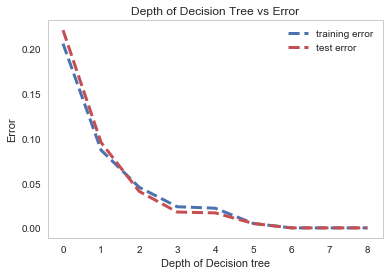

In [179]:
train_acc=[]
test_acc=[] 

for d in range(1, 10):
    model_dt = DecisionTreeClassifier(max_depth=d)
    model_dt.fit(X_train, y_train) 
    train_acc.append(1-model_dt.score(X=X_train,y=y_train))
    test_acc.append(1-model_dt.score(X=X_test,y=y_test))


plt.plot(train_acc,'b--', linewidth=3,)
plt.plot(test_acc, 'r--', linewidth=3,)
plt.legend(["training error","test error"])
plt.title("Depth of Decision Tree vs Error")
plt.xlabel("Depth of Decision tree")
plt.ylabel("Error")
plt.grid(False)
plt.show()


A depth of 6 looks like a good estimate.

In [180]:
model_dt_6 = DecisionTreeClassifier(max_depth=6)
model_dt_6.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [182]:
print("Test error is ", 1-model_dt_6.score(X_test, y_test))

Test error is  0.00492368291482


##### Decision Tree with depth 6

| Data | Error | 
|------|-------|
|  Test set     | 0.00492368291482  |

##### Decision tree graph

In [166]:
export_graphviz(model_dt_6, out_file="dt_graph.dot", class_names = ["edible", "poisonous"],            
                feature_names = features.columns, impurity=False, filled=True) 

with open("dt_graph.dot") as file:
    dot_graph = file.read()
graph = graphviz.Source(dot_graph)
graph.render("../results/tree")


'../results/tree.pdf'

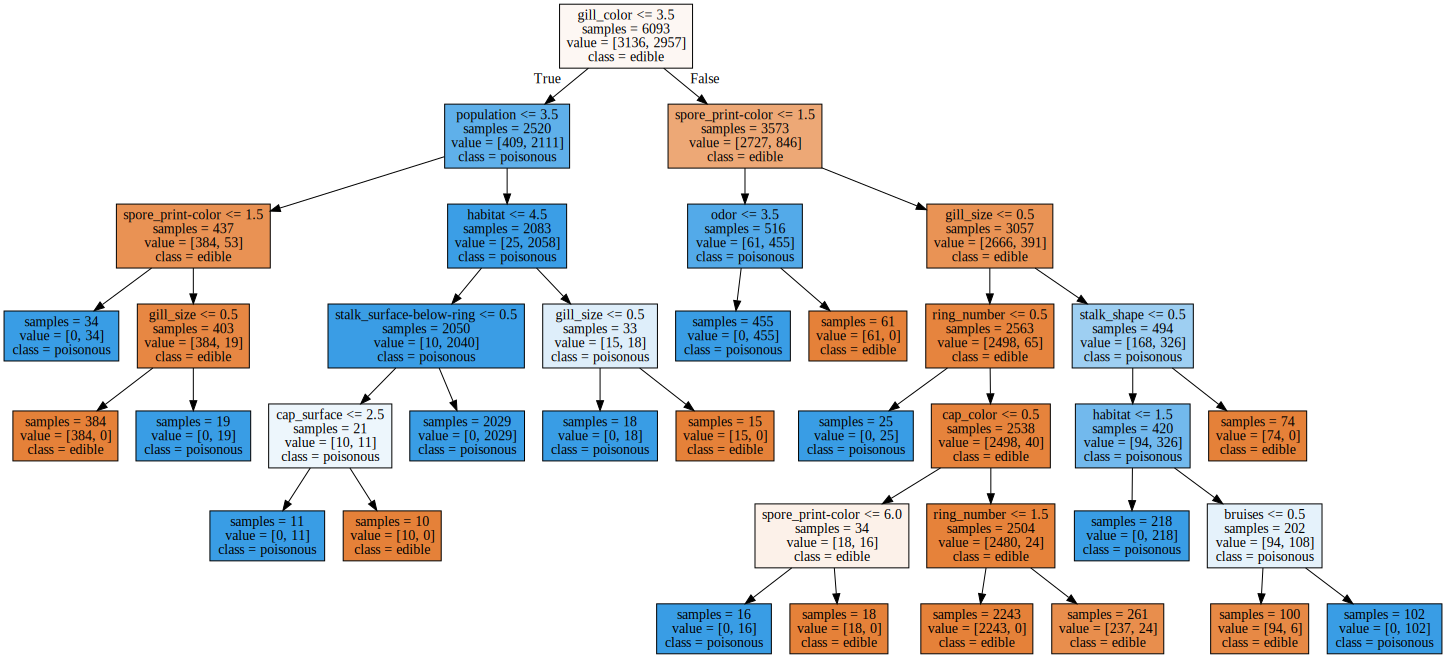

In [165]:
graph

##### Feature importance using Random Forest

In [205]:
model_rf = RandomForestClassifier(n_estimators=10,
                                  criterion='gini',
                                  random_state=10)

model_rf.fit(X_train, y_train)
print("The test error for Random Forest Classfifier is ",model_rf.score(X_test, y_test))

The test error for Random Forest Classfifier is  1.0


In [206]:
rf_features = model_rf.feature_importances_

In [207]:
rf_features
df = pd.DataFrame(rf_features)

In [208]:
df.index = np.arange(1, len(df) + 1)

featurenames = df_mushrooms.columns
featurenames = pd.DataFrame(df_mushrooms.columns)
featurenames.drop(featurenames.head(1).index, inplace=True)

dfnew = pd.concat([featurenames, df], axis=1)
dfnew.columns = ['featurenames', 'weight']
dfsorted = dfnew.sort_values(['weight'], ascending=[False])
dfsorted.head()
dfsorted.to_csv("../results/df_sorted.csv", encoding='utf-8', index=False)

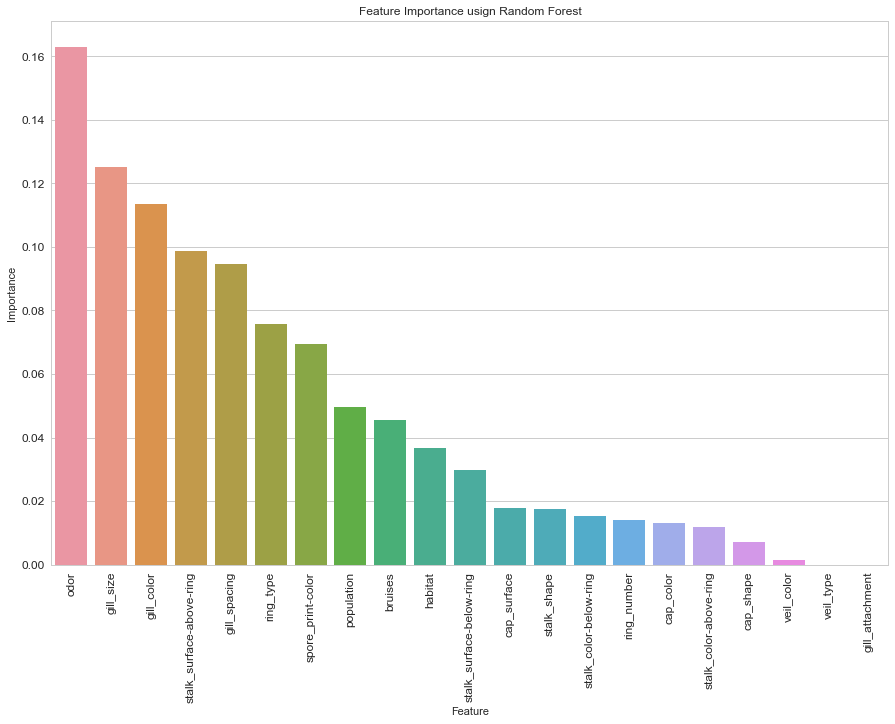

In [172]:
#sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
plt.tick_params(labelsize=12)
sns.barplot(x=dfsorted['featurenames'], y=dfsorted['weight'])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance usign Random Forest')
for item in plt.gca().xaxis.get_ticklabels():
    item.set_rotation(90)

plt.savefig('../results/feature_imp_rf.png')

>* From this feature importance tree, it looks like odor gill size and gill color are top 2 factors which play a very important role in identifying if a mushroom is poisonous or edible. So, do smell the mushroom when foraging in the forest!

##### Logistic Regression with L1 and L2 regularization 

Although when I used batch classifiers, Decision tree, random forest and linear svm gave me really good results, I will try to perform L1 and L2 regularization to se if anything changes.

###### L1 regularization

In [101]:
C_range = np.arange(1,3,0.1)
param_grid = dict(C=C_range)
lasso = LogisticRegression(penalty='l1',C=C_range)
model_lasso = GridSearchCV(lasso, param_grid)
model_lasso.fit(X_train, y_train) 
print("The best value of C for L1 is ",model_lasso.best_params_)
print("The score using best value of C for L1 is ",model_lasso.best_score_)

The best value of C for L1 is  {'C': 1.3000000000000003}
The score using best value of C for L1 is  0.94469062859


##### Here we can see that the optimal value of C for L1 is 1.3. let us use that to fit and train the model now

In [215]:
model_l1 = LogisticRegression(penalty='l1',C=1.3)
model_l1 = model_l1.fit(X_train, y_train)
#Number of selected features
#Using 1e-06 as the threshold to select a feature
print("Number of selected fetaures for L1 is ",np.sum(abs(model_l1.coef_)>1e-06))
# Validation error
# Validation error
print("The validation error for L1 is ",1-model_l1.score(X_test, y_test))

Number of selected fetaures for L1 is  20
The validation error for L1 is  0.055145248646


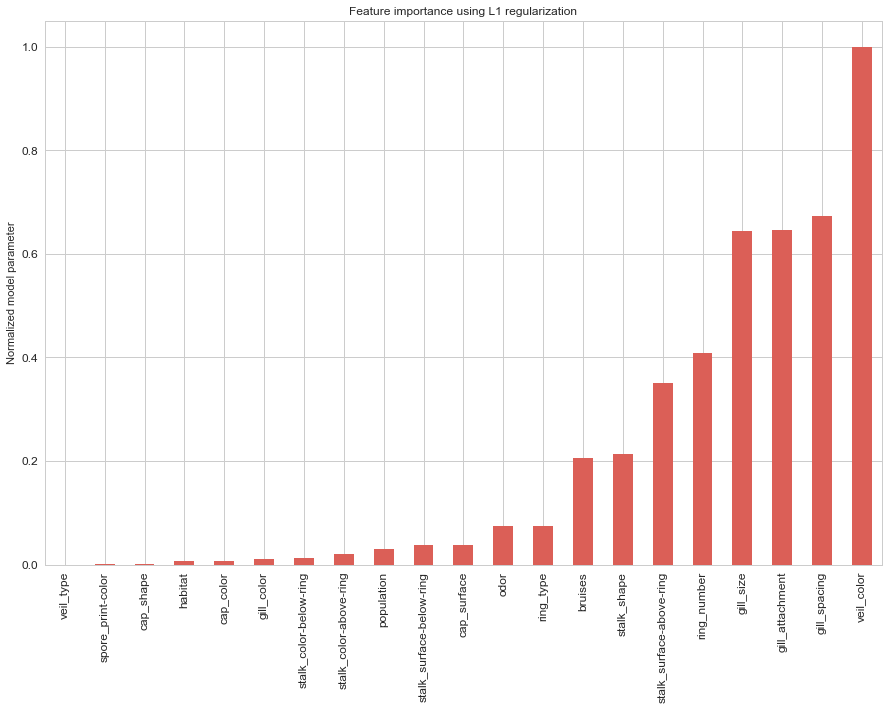

In [217]:
plt.figure(figsize=(15,10))
plt.tick_params(labelsize=12)
coefs = pd.Series(np.absolute(model_l1.coef_[0]), index=features.columns)
coefs = coefs.sort_values()
(coefs/np.max(coefs)).plot(kind="bar")
plt.ylabel('Normalized model parameter')
plt.title("Feature importance using L1 regularization")
plt.savefig('../results/feature_imp_lasso.png')

###### L2 regularization

In [213]:
C_range = np.arange(1,3,0.1)
param_grid = dict(C=C_range)
ridge = LogisticRegression(penalty='l2',C=C_range)
model_ridge = GridSearchCV(ridge, param_grid)
model_ridge.fit(X_train, y_train) 
print("The best value of C for L2  is ",model_ridge.best_params_)
print("The score using best value of C for L2 is ",model_ridge.best_score_)

The best value of C for L2  is  {'C': 1.0}
The score using best value of C for L2 is  0.945675365173


##### Here we can see that the optimal value of C  for L2 is 1. let us use that to fit and train the model now

In [188]:
model_l2 = LogisticRegression(penalty='l2',C=1)
model_l2 = model_l2.fit(X_train, y_train)
#Number of selected features
#Using 1e-06 as the threshold to select a feature
print("Number of selected fetaures for L2 is ",np.sum(abs(model_l2.coef_)>1e-06))
# Validation error
print("The validation error for L2 is ",1-model_l2.score(X_test, y_test))

Number of selected fetaures for L2 is  20
The validation error for L2 is  0.0531757754801


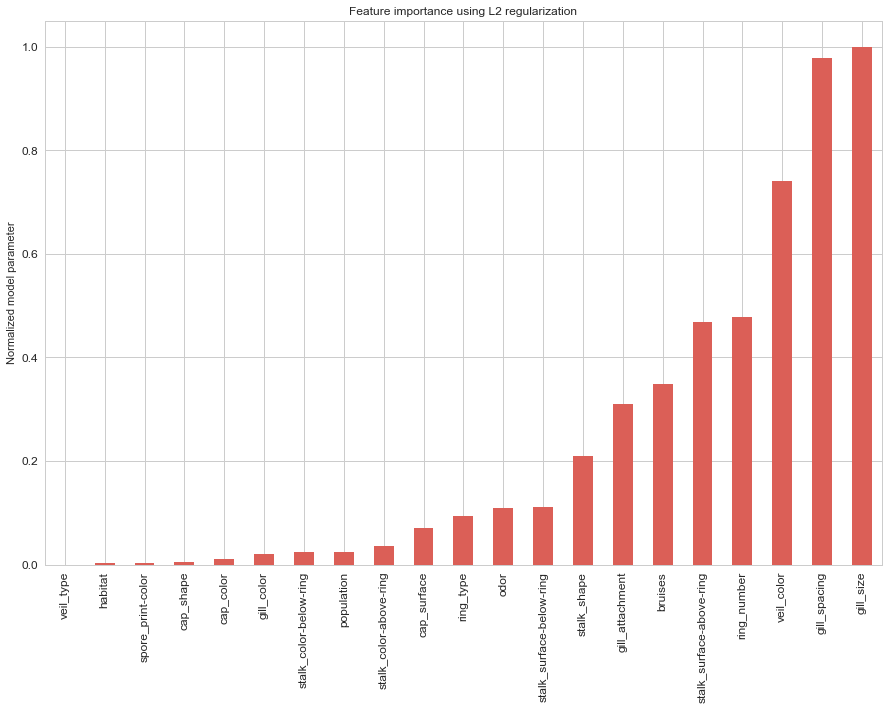

In [214]:
plt.figure(figsize=(15,10))
plt.tick_params(labelsize=12)
coefs = pd.Series(np.absolute(model_l2.coef_[0]), index=features.columns)
coefs = coefs.sort_values()
(coefs/np.max(coefs)).plot(kind="bar")
plt.ylabel('Normalized model parameter')
plt.title("Feature importance using L2 regularization")
plt.savefig('../results/feature_imp_l2.png')

##### Feature selection

In [192]:
def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)
    errors = [mean_squared_err(y, model.predict(X)), mean_squared_err(yv, model.predict(Xv))]
    return errors

rfe = RFE(estimator = Ridge(), n_features_to_select = 20)
rfe.fit(X_train, y_train)
rfe.score(X_test,y_test)
X_train_sel = X_train.iloc[:, rfe.support_]
X_test_sel = X_test.iloc[:, rfe.support_]

errs = fit_and_report(LinearRegression(), X_train_sel, y_train, X_test_sel, y_test)

print("Training error:   %.3g" % errs[0])
print("Validation error: %.3g" % errs[1])

Training error:   0.0655
Validation error: 0.0658


##### RFE with 20 selected features from Ridge model

| Data | Error | 
|------|-------|
|  Train set     | 0.0655  |
|  Test set     | 0.0658  |

In [193]:
def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)
    errors = [mean_squared_err(y, model.predict(X)), mean_squared_err(yv, model.predict(Xv))]
    return errors

rfe = RFE(estimator = Lasso(), n_features_to_select = 20)
rfe.fit(X_train, y_train)
rfe.score(X_test,y_test)
X_train_sel = X_train.iloc[:, rfe.support_]
X_test_sel = X_test.iloc[:, rfe.support_]

errs = fit_and_report(LinearRegression(), X_train_sel, y_train, X_test_sel, y_test)

print("Training error:   %.3g" % errs[0])
print("Validation error: %.3g" % errs[1])

Training error:   0.0655
Validation error: 0.0659


##### RFE with 20 selected features from Lasso model

| Data | Error | 
|------|-------|
|  Train set     | 0.0655  |
|  Test set     | 0.0659  |

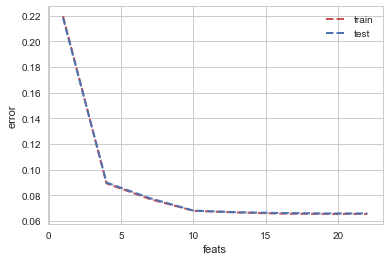

In [219]:
trainer = list()
valerr = list()

# make an array of the number of features to sweep through
#feats = np.array([5,10,15,20,22])
feats = np.arange(1,23,3)

# loop over the features, and fit the model each time
# also calculate train and test error
for f in feats:
    rfe = RFE(estimator = Ridge(), n_features_to_select = f)
    rfe.fit(X_train, y_train)
    X_train_sel = X_train.iloc[:,rfe.support_]
    X_test_sel = X_test.iloc[:,rfe.support_]
    
    errs = fit_and_report(LinearRegression(), X_train_sel, y_train, X_test_sel, y_test)
    
    trainer.append(errs[0])
    valerr.append(errs[1])

    # plot validation loss
plt.plot(feats, trainer,'--r', label="train", linewidth=2)
plt.plot(feats, valerr,'--b', label="test", linewidth=2)
plt.xlabel("feats")
plt.ylabel("error")
plt.legend()
plt.savefig('../results/ridge_feat.png')


In [218]:
def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)
    errors = [mean_squared_err(y, model.predict(X)), mean_squared_err(yv, model.predict(Xv))]
    return errors

rfe = RFE(estimator = Ridge(), n_features_to_select = 10)
rfe.fit(X_train, y_train)
rfe.score(X_test,y_test)
X_train_sel = X_train.iloc[:, rfe.support_]
X_test_sel = X_test.iloc[:, rfe.support_]

errs = fit_and_report(LinearRegression(), X_train_sel, y_train, X_test_sel, y_test)

print("Training error:   %.3g" % errs[0])
print("Validation error: %.3g" % errs[1])

Training error:   0.0679
Validation error: 0.0681
